## Exercise

In this exercise, you will be using support vector machines (SVMs) with various examples of 2D datasets. Experimenting with these datasets will help you gain intuition of how SVMs work and how to use a Gaussian kernel with SVMs.

#### Importing libraries

In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt

# Optimization module in scipy
from scipy import optimize

# Will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. 
# Since we are going to perform a classification task, we will use the support vector classifier class, 
# which is written as SVC in the Scikit-Learn's svm library
from sklearn import svm

# Tells matplotlib to embed plots within the notebook
%matplotlib inline

### SVM with linear kernels

#### Example Dataset 1

I will begin with a 2D example dataset which can be separated by a linear decision boundary. In this dataset, the positions of the positive examples (indicated with `x`) and the negative examples (indicated with `o`) suggest a natural separation indicated by the gap. However, there is an outlier positive example `x` on the far left at about (0.1, 4.1). As part of this exercise, I will also see how this outlier affects the SVM decision boundary.

#### Load and visualize data

In [2]:
# Load from ex6data1
# I will have X, y as keys in the dict data
data = loadmat('Data/ex6data1.mat')
x, y = data['X'], data['y'][:, 0]

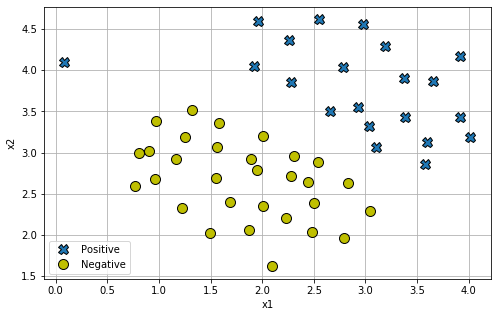

In [3]:
def plotData(x, y):
    pos = x[y == 1]
    neg = x[y == 0]
    
    plt.figure(figsize=(8,5))
    plt.plot(pos[:, 0], pos[:, 1], 'X', mec='k', ms=10, label='Positive')
    plt.plot(neg[:, 0], neg[:, 1], 'yo', mec='k', ms=10, label='Negative')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='lower left')
    plt.grid(True)
    
plotData(x, y)

#### Trying out different values for parameter $C$

Now I will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

When $C=1$, we should find that the SVM puts the decision boundary in the gap between the two datasets and *misclassifies* the data point on the far left, as shown in the first plot below.

When $C = 100$, we should find that the SVM now classifies every single example correctly but has a decision boundary that does not appear to be a natural fit for the data, as shown in the second plot below.

**Note:** Most SVM software packages automatically add the extra feature $x_0$ = 1 for us and automatically take care of learning the intercept term $\theta_0$. So when passing the training data to the SVM software, there is no need to add this extra feature $x_0 = 1$ ourselves.

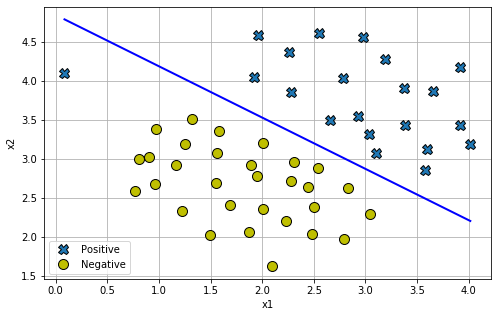

In [4]:
# SVM with linear kernel
linear_svm = svm.SVC(C=1, kernel='linear')

# Train model using the dataset
linear_svm.fit(x, y)

theta = (linear_svm.coef_).ravel() # optimal parameters computed by SVM excluding theta0
theta_0 = linear_svm.intercept_ # optimal theta0

# Only need 2 points to define a line, so I choose two endpoints of x1
boundary_x = np.array([np.min(x[:,0]), np.max(x[:,0])])
# Decision boundary occurs when theta0 + theta1 * x1 + theta2 * x2 = 0
# So, we get: x2 = (-1 / theta2) * (theta0 + theta1 * x1)
boundary_y = (-1 / theta[1]) * (theta_0 + theta[0] * boundary_x)

# Plot data and best fit line
plotData(x, y)
plt.plot(boundary_x, boundary_y, 'b-', lw=2)

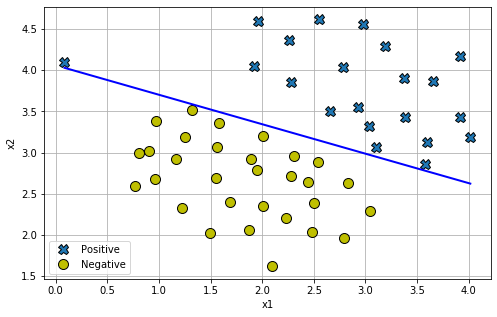

In [5]:
# SVM with linear kernel
linear_svm = svm.SVC(C=100, kernel='linear')

# Train model using the dataset
linear_svm.fit(x, y)

theta = (linear_svm.coef_).ravel() # optimal parameters computed by SVM excluding theta0
theta_0 = linear_svm.intercept_ # optimal theta0

# Only need 2 points to define a line, so I choose two endpoints of x1
boundary_x = np.array([np.min(x[:,0]), np.max(x[:,0])])
# Decision boundary occurs when theta0 + theta1 * x1 + theta2 * x2 = 0
# So, we get: x2 = (-1 / theta2) * (theta0 + theta1 * x1)
boundary_y = (-1 / theta[1]) * (theta_0 + theta[0] * boundary_x)

# Plot data and decision boundary
plotData(x, y)
plt.plot(boundary_x, boundary_y, 'b-', lw=2)

### SVM with Gaussian kernels

In the next two datasets, I will be using SVMs with Gaussian kernels to do non-linear classification.

#### Gaussian kernel

To find non-linear decision boundaries with SVM, I will need to first implement a Gaussian kernel. We can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples ($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$

I will now write a function called `gaussianKernel` that will compute the Gaussian kernel between two examples, ($x^{(i)}$, $x^{(j)}$).

In [6]:
def gaussianKernel(x1, x2, sigma):
    similarity = np.exp(-(np.sum((x1 - x2)**2)) / (2 * sigma**2))
    #similarity = np.exp(-(np.linalg.norm(x1 - x2)**2)/(2 * sigma**2)) - second option
    
    return similarity

In the function above, I have shown that I can implement a Gaussian kernel. However, the SVM module of Scikit-Learn that I am using has a built-in Gaussian kernel which is called 'rbf' or radial basis function.
The particularity of this built-in Gaussian kernel is that instead of dividing by $\sigma^2$, it multiplies by `gamma`. As long as I set `gamma` = $1/\sigma^2$, it will work just the same as the Gaussian kernel I wrote above.

### Example Dataset 2

#### Load and visualize data

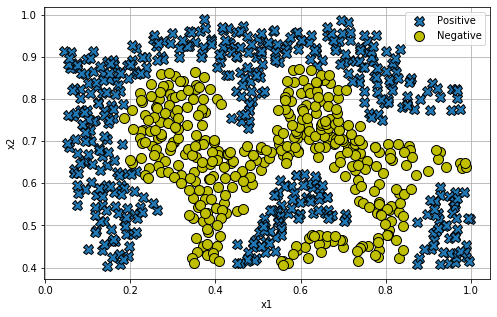

In [7]:
# Load from ex6data2
# I will have X, y as keys in the dict data
data = loadmat('Data/ex6data2.mat')
x, y = data['X'], data['y'][:, 0]

plotData(x, y)
plt.legend(loc='upper right')

From the plot, we can observe that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, I will be able to learn a non-linear decision boundary that can perform well for the dataset. 

In the next cell I will create a function called `plotDecisionBoundary` which will plot the non-linear decision boundary over the dataset. After that I will train the SVM with the Gaussian Kernel on this dataset and plot the decision boundary using the previously created function.

In [8]:
def plotDecisionBoundary(svm, x, y):
    plotData(x, y) # Plot dataset
    
    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
    x2plot = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
    x1, x2 = np.meshgrid(x1plot, x2plot)
    
    zvals = np.zeros(x1.shape)
    
    for i in range(x1.shape[1]):
        this_x = np.stack((x1[:, i], x2[:, i]), axis=1)
        zvals[:, i] = svm.predict(this_x)

    plt.contour(x1, x2, zvals, linewidths=2, colors='y')
    plt.contourf(x1, x2, zvals, cmap='YlGnBu', alpha=0.25)
    plt.title('Decision Boundary')

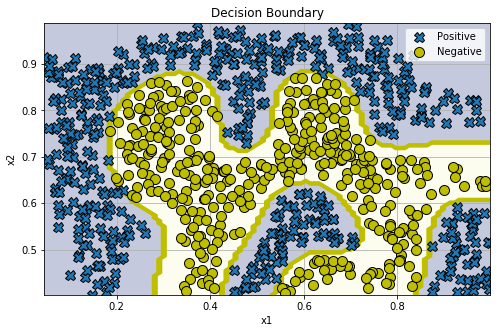

In [9]:
# SVM with Gaussian kernel
sigma = 0.1
gamma = sigma**(-2) # Used in the SVM module instead of sigma as described before
gaussian_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
# Train model using the dataset
gaussian_svm.fit(x, y)

theta = (linear_svm.dual_coef_).ravel() # optimal parameters computed by SVM

# Plot data and decision boundary
plotDecisionBoundary(gaussian_svm, x, y)
plt.legend(loc='upper right')

The decision boundary fits the data well, separating the positive and negative examples quite well.

### Example Dataset 3

In this last dataset, I will continue to gain more practice on how to use a SVM with a Gaussian kernel. This time I have two sets, a training set and a cross validation set.

#### Load and visualize data

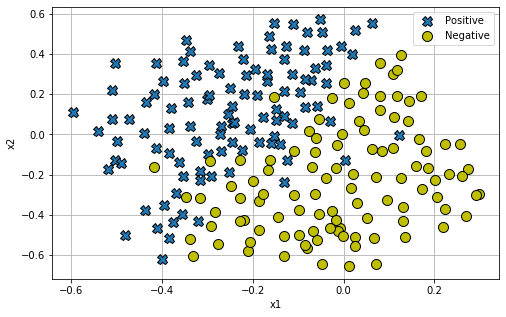

In [10]:
# Load from ex6data3
# I will have X, y, Xval, yval as keys in the dict data
data = loadmat('Data/ex6data3.mat')
x, y, x_cv, y_cv = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

plotData(x, y)
plt.legend(loc='upper right')

#### Selecting parameters $C$ and $\sigma$

The goal is to use the cross validation set `x_cv`, `y_cv` to determine the best $C$ and $\sigma$ parameters to use. For both $C$ and $\sigma$, I will try the same range of values {0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30} and try all possible pairs of values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). By the end of this, I will have trained and evaluated a total of $8^2 = 64$ different models.

To evaluate the best combination of the parameters $C$ and $\sigma$, I will write a function called `F_score` which will compute the precision, recall and f1_score values for each of the trained models.

In [11]:
def F_score(predictions, y_cv):
    # Number of positive predicitons that match the actual positive classifications
    true_positives = np.sum(predictions[y_cv == 1] == y_cv[y_cv == 1])
    num_pos_predictions = len(predictions[predictions == 1]) # Total number of positive predictions
    actual_pos_values = len(y_cv[y_cv == 1]) # Total number of actual positive classifications
    
    precision = true_positives / num_pos_predictions
    recall = true_positives / actual_pos_values
    f1_score = (2 * recall * precision) / (recall + precision)
    
    return f1_score

In [12]:
def select_params(x, y, x_cv, y_cv):
    C_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    best_score = 0
    best_C = 0
    best_sigma = 0
    
    for i in range(len(C_range)):
        C = C_range[i]
        
        for j in range(len(sigma_range)):
            sigma = sigma_range[j]
            gamma = sigma**(-2) # Used in the SVM module instead of sigma as described before
            gaussian_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma) # SVM with Gaussian kernel
            gaussian_svm.fit(x, y) # Train model using the dataset
            predictions = gaussian_svm.predict(x_cv)
            f1_score = F_score(predictions, y_cv)
            
            if f1_score > best_score:
                best_score = f1_score
                best_C = C
                best_sigma = sigma
    
    C = best_C
    sigma = best_sigma
    
    return C, sigma, best_score

Best C, sigma pair is (0.3, 0.1) with a score of 0.96.


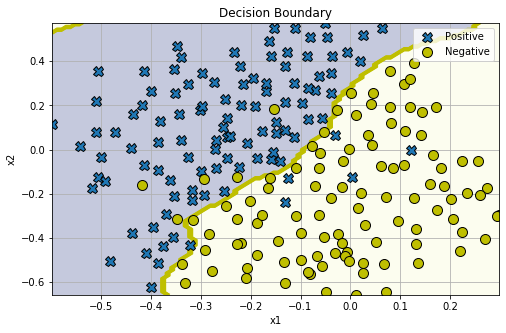

In [13]:
# Get best combination of parameters C and sigma
C, sigma, best_score = select_params(x, y, x_cv, y_cv)

print(f'Best C, sigma pair is ({C}, {sigma}) with a score of {best_score}.')

# SVM with Gaussian kernel
gamma = sigma**(-2) # Used in the SVM module instead of sigma as described before
gaussian_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
# Train model using the dataset
gaussian_svm.fit(x, y)

# Plot data and decision boundary
plotDecisionBoundary(gaussian_svm, x, y)
plt.legend(loc='upper right')